## Load Data from CSVs

In [1]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.
with open('daily_engagement.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    daily_engagement = list(reader)
    
print daily_engagement[0]

with open('project_submissions.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    project_submissions = list(reader)
    
print project_submissions[0]

# another option would be to write a function:
# def read_csv(filename):
#   with open(filename, 'rb') as f:
#   reader = unicodecsv.DictReader(f)
#   return list(reader)

# then call the function:
# daily_engagement = read_csv(daily_engagement.csv)
# print daily_engagement[0] ... etc.

{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


## Fixing Data Types

In [3]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'  # returns the boolean True instead of 'True' string
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'  # same
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [4]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [5]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

## Problems in the Data
Move this above Q2 then re-write answer for Q2 with looping function

In [6]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del[engagement_record['acct']]
    
daily_engagement[0]['account_key']

u'0'

## Investigating the Data

In [7]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

# My original answer:

"""def find_unique(list_name):
    unique = []
    first_entry = 0
    for i in list_name:
        if list_name[first_entry]['account_key'] not in unique:
            unique.append(list_name[first_entry]['account_key'])
            first_entry += 1
        else:
            first_entry += 1
    return unique"""

# in the video her answer was:

"""unique_enrolled_students = set()
for enrollment in enrollments:
  unique_enrolled_students.add(enrollment['account_key'])
len(unique_enrolled_students)"""

# during my review on 11/16: since I have moved Q3 above Q2, 
# I can write a function using her code to answer this question

def find_unique_accounts(table_name):
    set_of_accounts = set()
    for each in table_name:
        set_of_accounts.add(each['account_key'])
    return set_of_accounts
    
enrollment_num_rows = len(enrollments)
print enrollment_num_rows

1640


In [8]:
enrollment_unique_students = find_unique_accounts(enrollments)
len(enrollment_unique_students)

1302

In [9]:
engagement_num_rows = len(daily_engagement)
print engagement_num_rows

136240


In [10]:
engagement_unique_students = find_unique_accounts(daily_engagement)
len(engagement_unique_students)

1237

In [11]:
submission_num_rows = len(project_submissions)
print submission_num_rows

3642


In [12]:
submission_unique_students = find_unique_accounts(project_submissions)
len(submission_unique_students)

743

## Missing Engagement Records

In [13]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in engagement_unique_students:
        print enrollment
        break
        
# students all canceled, join date and cancel date are the same! 
# and days_to_cancel is 0

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


## Checking for More Problem Records

In [14]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table BUT STAYED ENROLLED AT LEAST A DAY) that remain, if any.

count_surprising_records = 0
for enrollment in enrollments:
    student = enrollment['account_key'] 
    if student not in engagement_unique_students \
    and enrollment['join_date'] != enrollment['cancel_date']:
        count_surprising_records += 1
        print enrollment
print count_surprising_records

# These are all test accounts! 'is_udacity': True

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}
3


## Tracking Down the Remaining Problems

In [15]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [16]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [17]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [18]:
print len(enrollments)

1640


In [19]:
num_non_udacity_enrollments = len(non_udacity_enrollments)
print num_non_udacity_enrollments

1622


In [20]:
print non_udacity_enrollments[0]['days_to_cancel']

6


In [21]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
""" MY ANSWER
each_non_udacity_enrollment = 0

while each_non_udacity_enrollment < num_non_udacity_enrollments:
    if non_udacity_enrollments[each_non_udacity_enrollment]['days_to_cancel'] > 7 \
    or non_udacity_enrollments[each_non_udacity_enrollment]['days_to_cancel'] == None:
        new_paid_key = non_udacity_enrollments[each_non_udacity_enrollment]['account_key']
        new_paid_value = non_udacity_enrollments[each_non_udacity_enrollment]['join_date']
        paid_students[new_paid_key] = new_paid_value
        each_non_udacity_enrollment += 1
    else:
        each_non_udacity_enrollment += 1"""
        
# this worked, but can use for loop instead of while loop:

for each in non_udacity_enrollments:
    if not each['is_canceled'] or each['days_to_cancel'] > 7:
        new_paid_key = each['account_key']
        new_paid_value = each['join_date']
    
    # take into account students who cancel and then re-enroll
    # only keep their most recent start date
        if new_paid_key not in paid_students or \
                new_paid_value > paid_students[new_paid_key]:
            paid_students[new_paid_key] = new_paid_value


print len(paid_students)

995


## Getting Data from First Week

In [22]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [23]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []
for daily_record in daily_engagement:
    if daily_record['account_key'] in paid_students:
        keep_engagement = daily_record['account_key']
        join_date = paid_students[keep_engagement]
        engage = daily_record['utc_date']
        if within_one_week(join_date, engage) == True:
            paid_engagement_in_first_week.append(daily_record)
            
print len(paid_engagement_in_first_week)

paid_submissions = []
for submission in project_submissions:
    if submission['account_key'] in paid_students:
        paid_submissions.append(submission)
        
print len(paid_submissions)

## in the video answer she first created a function that filtered out 
## non-paid students from EACH list (enrollments, daily_engagement, and
## project_submissions) then continued...
## my answer got the right answer so I'll just continue

6919
3618


## Exploring Student Engagement

In [24]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [25]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [26]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code (stopped here 11/28, go back to videos)

In [27]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student

print max_minutes

3564.7332645


In [28]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print engagement_record

{u'lessons_completed': 4, u'num_courses_visited': 4, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 13, 0, 0)}
{u'lessons_completed': 1, u'num_cour

## Lessons Completed in First Week

In [29]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

# print engagement_by_account['1']

"""lessons_completed_first_week_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_lessons = 0
    for engagement_record in engagement_for_student:
        total_lessons += engagement_record['lessons_completed']
    lessons_completed_first_week_by_account[account_key] = total_lessons
    
total_lessons = lessons_completed_first_week_by_account.values()"""

# this answer above worked, but she suggested writing more functions
# her first function grouped data:

from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')

# the above takes in some data and groups it by some key name
# library Pandas has a built-in function that works in a similar way

def print_statistics(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)

# print_statistics(total_lessons)

# below is another of her functions, grouped_data is the dictionary
# we are looping over

def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

total_lessons2 = sum_grouped_items(engagement_by_account, 'lessons_completed')
print_statistics(total_lessons2.values())

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [30]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

def num_records(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points: 
            if data_point[field_name] > 0:
                total += 1
        summed_data[key] = total
    return summed_data

num_days_first_week = num_records(engagement_by_account, 'total_minutes_visited')
print_statistics(num_days_first_week.values())

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## Splitting out Passing Students (stopped here 11/29)

In [31]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not. Then find len of each

# starting with daily_engagement and project_submissions

subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()
for each in paid_submissions:
    if each['lesson_key'] in subway_project_lesson_keys:
        if each['assigned_rating'] == 'PASSED' \
        or each['assigned_rating'] == 'DISTINCTION':
            pass_subway_project.add(each['account_key'])
        
print str(len(pass_subway_project)) + " students passed subway project (this is correct)"      
        
passing_engagement = []
non_passing_engagement = []
    
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)
        
print len(passing_engagement)

print len(non_passing_engagement)

# Wow, I completely misunderstood what the question was asking for
# FML

647 students passed subway project (this is correct)
4527
2392


## Comparing the Two Student Groups

In [32]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier:
# minutes spent in the classroom
# lessons completed
# days visited

passing_grouped = group_data(passing_engagement, 'account_key')

passing_minutes = sum_grouped_items(passing_grouped, 'total_minutes_visited')
print "Minutes spent in classroom for students who passed first project:"
print_statistics(passing_minutes.values())

non_passing_grouped = group_data(non_passing_engagement, 'account_key')

non_passing_minutes = sum_grouped_items(non_passing_grouped, 'total_minutes_visited')
print "Minutes spent in classroom for students who did not pass:"
print_statistics(non_passing_minutes.values())

passing_lessons_completed = sum_grouped_items(passing_grouped, 'lessons_completed')
print "Lessons completed by passing students:"
print_statistics(passing_lessons_completed.values())

non_passing_lessons_completed = sum_grouped_items(non_passing_grouped, 'lessons_completed')
print "Lessons completed by non-passing students:"
print_statistics(non_passing_lessons_completed.values())

passing_days_visited = num_records(passing_grouped, 'total_minutes_visited')
print "Days visited by passing students:"
print_statistics(passing_days_visited.values())

non_passing_days_visited = num_records(non_passing_grouped, 'total_minutes_visited')
print "Days visited by non-passing students:"
print_statistics(non_passing_days_visited.values())

# all of these answers are correct!

Minutes spent in classroom for students who passed first project:
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645
Minutes spent in classroom for students who did not pass:
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933
Lessons completed by passing students:
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36
Lessons completed by non-passing students:
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27
Days visited by passing students:
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7
Days visited by non-passing students:
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7


## Making Histograms

Minutes spent in classroom for students who passed first project:


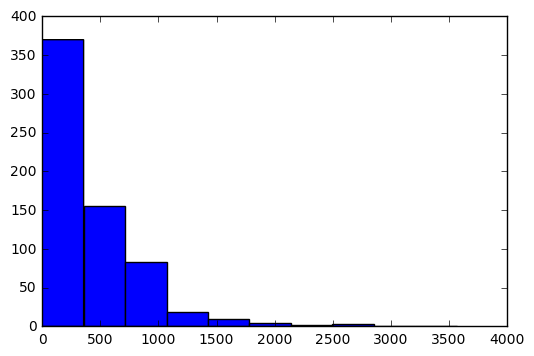

In [33]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

%matplotlib inline
import matplotlib.pyplot as plt

def make_histogram(list_name):    
    plt.hist(list_name)
    
passing_minutes_list = passing_minutes.values()
non_passing_minutes_list = non_passing_minutes.values()

print "Minutes spent in classroom for students who passed first project:"
make_histogram(passing_minutes_list)

Minutes spent in classroom for students who did not pass:


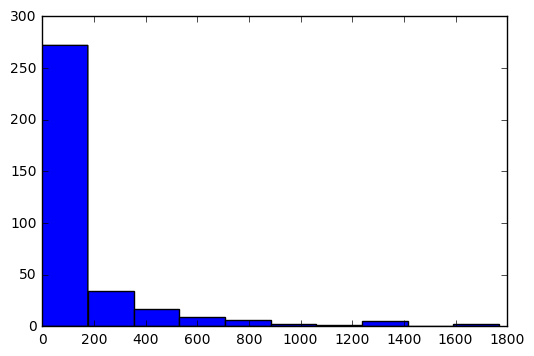

In [34]:
print "Minutes spent in classroom for students who did not pass:"
make_histogram(non_passing_minutes_list)

Lessons completed by passing students:


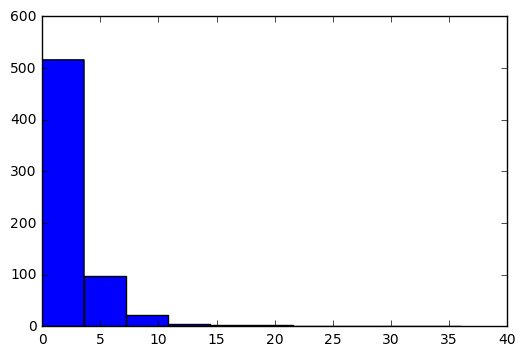

In [35]:
print "Lessons completed by passing students:"
passing_lessons_completed_list = passing_lessons_completed.values()
make_histogram(passing_lessons_completed_list)

Lessons completed by non-passing students:


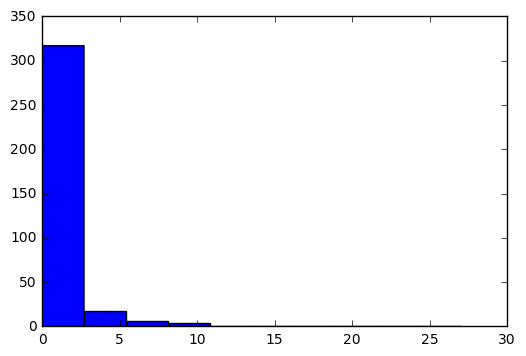

In [36]:
print "Lessons completed by non-passing students:"
non_passing_lessons_completed_list = non_passing_lessons_completed.values()
make_histogram(non_passing_lessons_completed_list)

Days visited by passing students:


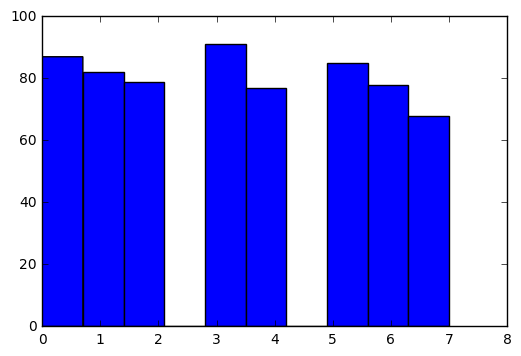

In [37]:
print "Days visited by passing students:"
passing_days_visited_list = passing_days_visited.values()
make_histogram(passing_days_visited_list)

Days visited by non-passing students:


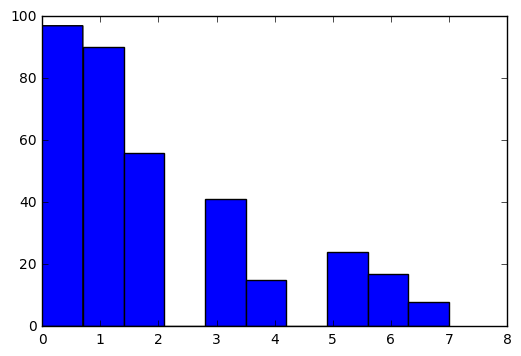

In [38]:
print "Days visited by non-passing students:"
non_passing_days_visited_list = non_passing_days_visited.values()
make_histogram(non_passing_days_visited_list)

## Improving Plots and Sharing Findings

white: Passing Students
green: Non-passing Students


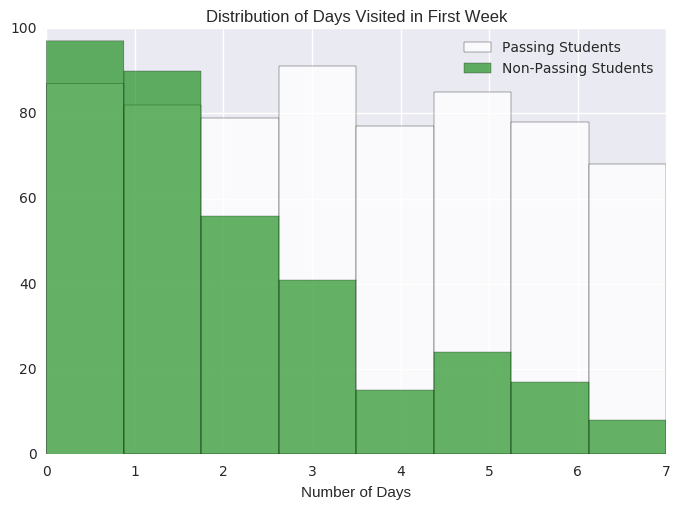

In [69]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

import seaborn as sns

print 'white: Passing Students'
plt.hist(passing_days_visited_list, bins=8, alpha=0.8, color="white", orientation="vertical", label="Passing Students")
plt.xlabel("Number of Days")

print 'green: Non-passing Students'
plt.hist(non_passing_days_visited_list, bins=8, alpha=0.6, color="green", orientation="vertical", label="Non-Passing Students")
plt.title("Distribution of Days Visited in First Week")

plt.legend(loc='upper right')